In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.integrate
import scipy.optimize

In [2]:
plt.style.use('ggplot')

In [5]:
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['hatch.linewidth'] = 5.0
mpl.rcParams['axes.facecolor']='whitesmoke'
mpl.rcParams['axes.edgecolor']='white'
mpl.rcParams['axes.linewidth']=3

mpl.rcParams['text.color'] = 'dimgrey'
#mpl.rcParams['xtick.major.width'] = 2
#mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.color']='k'
mpl.rcParams['ytick.color']='k'
mpl.rcParams['axes.labelcolor']='k'

mpl.rcParams['font.size']=16
mpl.rcParams['xtick.direction']='in'
mpl.rcParams['ytick.direction']='in'
mpl.rcParams['xtick.major.size'] = 5.5
mpl.rcParams['ytick.major.size'] = 5.5
mpl.rcParams['xtick.minor.size'] = 3.5
mpl.rcParams['ytick.minor.size'] = 3.5

mpl.rcParams["text.usetex"] = True

In [6]:
D=384399000 #earth moon periapse in m
M=5.972e24 #earth mass in kg
m=7.34767309e22 #moon mass in kg
R=6371000 #earth radius in m
r=1737000 #moon radius in m
G=6.67408e-11 #G in m, kg and s
Rgeo=42164000 #geostationary orbit in m

mu=m/M
l=0.847968236576# from min(etas)  1/(1+np.sqrt(mu))

In [51]:
v0=np.sqrt(G*M/R)/1000
print('v0: ',v0)
ve=3.5
vl=1.31*v0/1000+1.5
print(vl)
print(np.exp(vl/ve))

v0:  7.9095504599847954
1.51036151110258
1.5396141919251107


In [19]:
print(35.5/100)

0.355


In [5]:
print(mu)
print(mu/(1+mu))
print(R/D)
print(Rgeo/D)

0.01230353832886805
0.01215400111035766
0.016573924489918027
0.10968811053098473


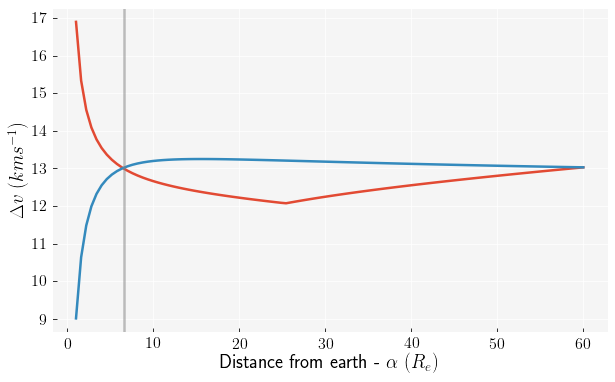

In [60]:
def vSqrt(x):
    return np.sqrt(2/(x*(x+1)))
def vMu(x):
    return x/(60**1.5)
def vSQRT(x):
    return np.sqrt(2*x/(x+1))
def vLine(al,v0,vE,beta):
    sqrts=vSqrt(al)
    mus=vMu(al)
    SQRTs=vSQRT(al)
    return (v0*(SQRTs+np.abs(sqrts-mus))) + beta - vE
def vCirc(al,v0,vE,beta):
    sqrt=np.sqrt(2/(al*(al+1)))
    bracket=al+np.abs(np.sqrt((al+1)/2)-1)
    return (v0*sqrt*bracket) + beta - vE
def vAlt(al,v0,vE,beta):
    xs=al
    sqrts=vSqrt(xs)
    mus=vMu(xs)
    SQRTs=vSQRT(xs)
    return SQRTs
    
als=np.linspace(1,60,100)
#sqrts=vSqrt(xs)
#mus=vMu(xs)
#SQRTs=vSQRT(xs)
vLines=vLine(als,v0,0.4,1.5)
vCircs=vCirc(als,v0,0.4,1.5)
vAlts=vAlt(als,v0,0.4,1.5)
thisFig=plt.figure(figsize=(10,6))
thisPlot=plt.gca()
thisPlot.plot(als,vLines)
thisPlot.plot(als,vCircs)
#thisPlot.plot(xs,vAlts,ls='--')
#thisPlot.axhline(np.sqrt(2),c='grey',alpha=0.5)
thisPlot.axvline(6.6,c='grey',alpha=0.5)

thisPlot.set_xlabel(r'Distance from earth - $\alpha$ $(R_e)$')
thisPlot.set_ylabel(r'$\Delta v \ (kms^{-1})$')

vMin=np.min(vLines)
#thisPlot.axhline(vMin,c='k',alpha=0.5)

#thisPlot.set_xlim(5,10)
#thisPlot.set_ylim(13,14)4

plt.savefig('plots/deltaCompare.pdf')
#print(vCirc(51))

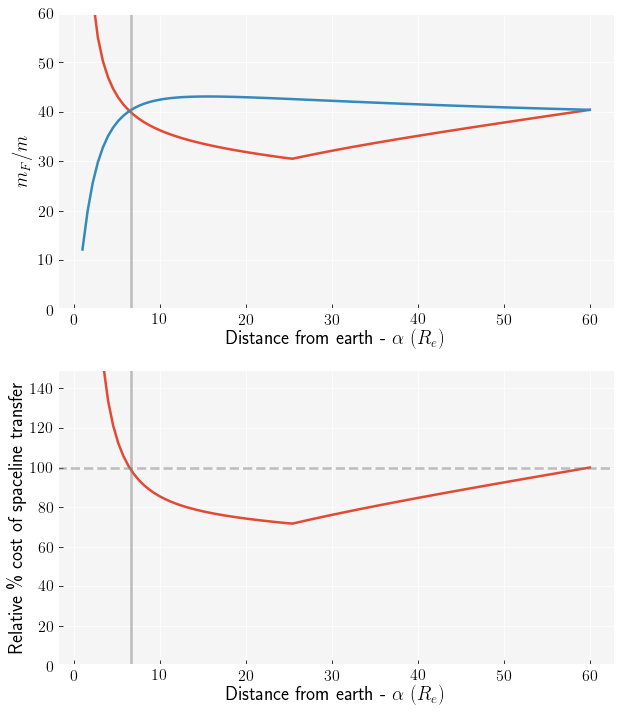

In [72]:
def m_F(dVs,ve):
    return np.exp(dVs/ve)-1
m_l=m_F(vLines,3.5)
m_c=m_F(vCircs,3.5)

thisFig=plt.figure(figsize=(10,12))
thisGrid=mpl.gridspec.GridSpec(2,1)
thisPlot=plt.subplot(thisGrid[0,0])
thisPlot.plot(als,m_l)
thisPlot.plot(als,m_c)
#thisPlot.plot(xs,vAlts,ls='--')
#thisPlot.axhline(np.sqrt(2),c='grey',alpha=0.5)
thisPlot.set_ylim(0,60)
thisPlot.axvline(6.6,c='grey',alpha=0.5)

thisPlot.set_xlabel(r'Distance from earth - $\alpha$ $(R_e)$')
thisPlot.set_ylabel(r'$m_F / m$')

thatPlot=plt.subplot(thisGrid[1,0])
thatPlot.plot(als,100*m_l/m_c)
#thatPlot.plot(als,m_c)
#thisPlot.plot(xs,vAlts,ls='--')
#thisPlot.axhline(np.sqrt(2),c='grey',alpha=0.5)
thatPlot.axvline(6.6,c='grey',alpha=0.5)
thatPlot.axhline(100,c='grey',alpha=0.5,ls='--')
thatPlot.set_ylim(0,150)

thatPlot.set_xlabel(r'Distance from earth - $\alpha$ $(R_e)$')
thatPlot.set_ylabel(r'Relative \% cost of spaceline transfer')

plt.savefig('plots/massFuel.pdf')

In [27]:
close=np.argmin(np.abs(vCircs-vMin))
print(xs[close])
print(vMin)
print(vAlt(6.6))

2.7878787878787876
1.3873914541224759
1.3178930553209385


In [6]:
def eta(eps,value=0):
    return (1/eps) + (mu/(1-eps)) + (1+mu)*(eps**2)/2 - mu*eps - value
def etaGrav(eps): #excluding centrifugal forces
    return (1/eps) + (mu/(1-eps))
def findEps(value,lBound,uBound): # finds the h at which eta is equal to a given value
    return scipy.optimize.brentq(eta,lBound,uBound,args=(value)) #not vectorised, maybe better methods?


In [7]:
def tUniform(eps,h,beta,mu):
    return beta*(eps-h)*(np.power(eps*h,-1) - mu*np.power((1-eps)*(1-h),-1))
def area(eps,h,alpha):
    a=np.exp((alpha/h) - (alpha/eps) - 1)
    #a[a<1]=1
    return a
def aTaper(eps,h,alpha):
    a=np.exp((alpha/h) - (alpha/eps))
    return a
def volume(h,alpha):
    return scipy.integrate.quad(area,h,1-(r/D),args=(h,alpha))

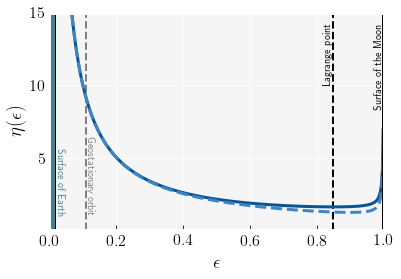

In [8]:
#just plotting eta(eps) for reference
eps=np.linspace(R/D,1-0.5*r/D,100000)
etas=eta(eps)
etaDash=etaGrav(eps)
etaPlot=plt.gca()

etaPlot.axvline(Rgeo/D,c='grey',ls='--',lw=2)
etaPlot.axvline(l,c='k',ls='--',lw=2)

etaPlot.plot(eps,etas,c='#0B5394',lw=3)
etaPlot.plot(eps,etaDash,ls='--',c='#3D85C6',lw=3)
etaPlot.axvspan(-R/D,R/D,color='#45818E')
etaPlot.axvline(R/D,color='k',lw=1)
etaPlot.axvspan(1-r/D,1+r/D,color='#CCCCCC')
etaPlot.axvline(1-r/D,color='k',lw=1)

etaPlot.text(0.03475,3.3,"Surface of Earth",color='#45818E',rotation=270,fontsize=10,horizontalalignment='center',verticalalignment='center')
etaPlot.text(0.9825,11.25,"Surface of the Moon",color='k',rotation=90,fontsize=10,horizontalalignment='center',verticalalignment='center')
etaPlot.text(0.83,12.1,"Lagrange point",color='k',rotation=90,fontsize=10,horizontalalignment='center',verticalalignment='center')
etaPlot.text(0.123,3.75,"Geostationary orbit",color='grey',rotation=270,fontsize=10,horizontalalignment='center',verticalalignment='center')



#etaPlot.set_yscale('log')
etaPlot.set_ylim(0.0,15)
etaPlot.set_yticks([5,10,15])
etaPlot.set_xlim(0,1.001)
etaPlot.set_ylabel(r'$\eta(\epsilon)$')
etaPlot.set_xlabel(r'$\epsilon$')
plt.savefig('plots/eta.pdf',bbox_inches='tight')
plt.show()

/Users/Zephyr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


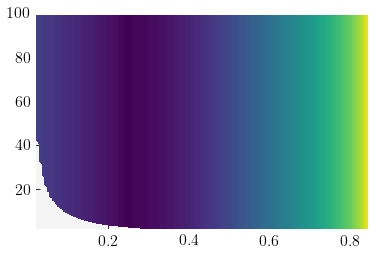

In [29]:
def lambdaAnchor(h):
    return (eta(1-r/D) - eta(h))/(h**-2 - mu*(1-h)**-2)
nAlphas=128
nHs=128
alphas=10**np.linspace(0,2,nAlphas)
hs=np.linspace(R/D,l,nHs)
lambdas=np.zeros((nAlphas,nHs))
for i in range(nAlphas):
    for j in range(nHs):
        if alphas[i] < eta(hs[j])-eta(l): #cable breaks
            lambdas[i,j]=0
        elif eta(hs[j])<eta(1-r/D): #cable collapses without counterweight
            lambdas[i,j]=(1-hs[j]-r/D) + lambdaAnchor(hs[j])
        else:
            lambdas[i,j]=(1-hs[j]-r/D)
plt.contourf(hs,alphas,np.log10(lambdas),100)
plt.show()

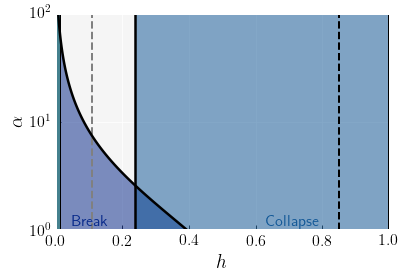

In [30]:
# maximum and minimum h for a uniform cable
nAlphas=64
alphas=10**np.linspace(0,2,nAlphas)
hMax=findEps(eta(1-r/D), 1e-6, l)
hMins=np.zeros(nAlphas)
for i in range(nAlphas):
    hMins[i]=findEps(alphas[i]+eta(l),1e-6,l)
    
hFill=np.append(hMins,[R/D,R/D])
aFill=np.append(alphas,[100,1])

hPlot=plt.gca()

hPlot.axvline(Rgeo/D,c='grey',ls='--',lw=2)
hPlot.axvline(l,c='k',ls='--',lw=2)

hPlot.plot(hMins,alphas,c='k')
hPlot.fill(hFill,aFill,c='#002387',alpha=0.5)

hPlot.axvline(hMax,c='k')
hPlot.axvspan(hMax,1,color='#0B5394',alpha=0.5)
#hPlot.axvline(R/D,c='k',lw=1)
#hPlot.axvspan(-R/D,R/D,color='green',alpha=0.5)
#hPlot.axvline(Rgeo/D,c='grey',ls=':',lw=1)
#hPlot.axvspan(1-(r/D),1+(r/D),color='grey')
#hPlot.axvline(1-r/D,c='k',lw=1)

hPlot.axvspan(-R/D,R/D,color='#45818E')
hPlot.axvline(R/D,color='k',lw=1)
hPlot.axvspan(1-r/D,1+r/D,color='#CCCCCC')
hPlot.axvline(1-r/D,color='k',lw=1)

hPlot.set_xlim(0,1.001)
hPlot.set_yscale('log')
hPlot.set_ylim(1,100)
hPlot.text(0.63,1.1,'Collapse',color='#0B5394',alpha=0.9)
hPlot.text(0.05,1.1,'Break',color='#002387',alpha=0.9)
hPlot.set_xlabel(r'$h$')
hPlot.set_ylabel(r'$\alpha$')


plt.savefig('plots/uniform.pdf',bbox_inches='tight')
plt.show()

In [255]:
print(np.exp(1/(3.6*R/D)))

18999586.9579


/Users/Zephyr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:143: RuntimeWarning: divide by zero encountered in true_divide
/Users/Zephyr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:143: RuntimeWarning: invalid value encountered in true_divide
/Users/Zephyr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:146: RuntimeWarning: divide by zero encountered in true_divide
/Users/Zephyr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:146: RuntimeWarning: invalid value encountered in true_divide


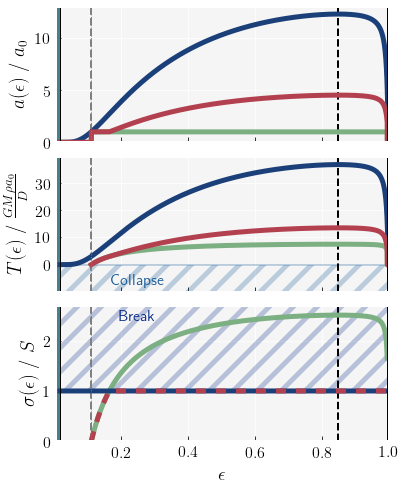

In [12]:
mpl.rcParams['lines.linewidth'] = 5
def aVarying(eps,h,alpha):
    return np.exp((eta(h)-eta(eps))/alpha)
def aHybrid(eps,h,alpha):
    end=np.argwhere((eps<h) | (eps>1-r/D))
    a=np.zeros_like(eps)
    a=np.maximum( 1, np.exp(-1+ (eta(h)-eta(eps))/alpha) )
    a[end]=0
    return a
def nmVarying(eps,h,alpha):
    return np.exp(((1/h)-(1/eps)+ 0.5*h**2 - + 0.5*eps**2)/alpha)
def nmHybrid(eps,h,alpha):
    end=np.argwhere((eps<h) | (eps>1-r/D))
    a=np.zeros_like(eps)
    a=np.maximum( 1, np.exp(-1+ ((1/h)-(1/eps)+ 0.5*h**2 - + 0.5*eps**2)/alpha) )
    a[end]=0
    return a
def aUniform(eps,h,alpha):
    end=np.argwhere((eps<h) | (eps>1-r/D))
    a=np.ones_like(eps)
    a[end]=0
    return a
def tUniform(eps,h,alpha):
    end=np.argwhere((eps<h) | (eps>1-r/D))
    T=eta(h)-eta(eps)
    T[end]=0
    return T
def tVarying(eps,h,alpha):
    a=aVarying(eps,h,alpha)
    return alpha*a
def tHybrid(eps,h,alpha):
    end=np.argwhere((eps<h) | (eps>1-r/D))
    a=aHybrid(eps,h,alpha)
    thick=np.argwhere(a>1)
    T=eta(h)-eta(eps)
    T[thick]=alpha*a[thick]
    T[end]=0
    return T
def tNmHybrid(eps,h,alpha):
    end=np.argwhere((eps<h) | (eps>1-r/D))
    a=nmHybrid(eps,h,alpha)
    thick=np.argwhere(a>1)
    T=(1/h)-(1/eps) + 0.5*h**2 - + 0.5*eps**2
    T[thick]=alpha*a[thick]
    T[end]=0
    return T
def tNmVarying(eps,h,alpha):
    a=nmVarying(eps,h,alpha)
    return alpha*a
def tNmUniform(eps,h,alpha):
    end=np.argwhere((eps<h) | (eps>1-r/D))
    T=(1/h)-(1/eps) + 0.5*h**2 - + 0.5*eps**2
    T[end]=0
    return T

#ADD - 3 panel plot with T and sigma
plotAlpha=1.0
eps=np.linspace(R/D,1-0.1*r/D,10000)
#eps0=H/(D)
alpha=3
h=Rgeo/D

hCol='#B2404F'
vCol='#1B4079'
uCol='#7CAF82'

#varying=aVarying(eps,h,alpha)
#hybrid=aHybrid(eps,h,alpha)
#noMoonVarying=nmVarying(eps,h,alpha)
#noMoonHybrid=nmHybrid(eps,h,alpha)
#uniform=aUniform(eps,h,alpha)

#tVary = tVarying(eps,h,alpha)
#tUni = tUniform(eps,h,alpha)
#tHyb = tHybrid(eps,h,alpha)
#aFull=aPlot(eps,eps0,alpha,mu)
#aMoon=aPlot(eps,eps0,alpha,0)
#aHybridFull=aHybridPlot(eps,eps0,alpha,mu)
#aHybridMoon=aHybridPlot(eps,eps0,alpha,0)

modelFig = plt.figure(figsize=(6,8))
modelGrid=mpl.gridspec.GridSpec(3,1)
modelGrid.update(hspace=0.1)

areaPlot=plt.subplot(modelGrid[0,0])

areaPlot.axvline(Rgeo/D,c='grey',ls='--',lw=2)
areaPlot.axvline(l,c='k',ls='--',lw=2)

areaPlot.plot(eps, aUniform(eps,h,alpha), c=uCol,alpha=plotAlpha)
areaPlot.plot(eps, aVarying(eps,h,alpha), c=vCol,alpha=plotAlpha)
areaPlot.plot(eps, aHybrid(eps,h,alpha), c=hCol,alpha=plotAlpha)
#areaPlot.plot(eps, aUniform(eps,2*h,alpha), c=uCol,alpha=0.5,ls='--')
#areaPlot.plot(eps, aVarying(eps,2*h,alpha), c=vCol,alpha=0.5,ls='--')
#areaPlot.plot(eps, aHybrid(eps,2*h,alpha), c='darkred',alpha=0.5,ls='--')

areaPlot.set_ylim(0.1,13)
areaPlot.set_xlim(0,1.002)
areaPlot.axvspan(-R/D,R/D,color='#45818E')
areaPlot.axvline(R/D,color='k',lw=1)
areaPlot.axvspan(1-r/D,1+r/D,color='#CCCCCC')
areaPlot.axvline(1-r/D,color='k',lw=1)
areaPlot.set_ylabel(r'$a(\epsilon) \ / \ a_0$')
areaPlot.set_xticklabels([])
areaPlot.set_yticks([0,5,10])
areaPlot.axvline(Rgeo/D,c='grey',ls=':',lw=1)
#areaPlot.set_xlabel(r'$\epsilon$')

tensionPlot=plt.subplot(modelGrid[1,0])

tensionPlot.axvline(Rgeo/D,c='grey',ls='--',lw=2)
tensionPlot.axvline(l,c='k',ls='--',lw=2)

end=np.argwhere(eps>h)

tensionPlot.plot(eps[end], tUniform(eps[end],h,alpha), c=uCol,alpha=plotAlpha)
tensionPlot.plot(eps, tVarying(eps,h,alpha), c=vCol,alpha=plotAlpha)
tensionPlot.plot(eps[end], tHybrid(eps[end],h,alpha), c=hCol,alpha=plotAlpha)
#tensionPlot.plot(eps, tHybrid(eps,2*h,alpha), c='darkred',alpha=0.5, ls=':')
#tensionPlot.plot(eps, tVarying(eps,2*h,alpha), c=vCol,alpha=0.5, ls='--')
#tensionPlot.plot(eps, tUniform(eps,2*h,alpha), c=uCol,alpha=0.5, ls='--')

tensionPlot.axhspan(-100,0,alpha=0.25,hatch='/',fill='False',facecolor="None",edgecolor='#0B5394',lw=2)
tensionPlot.text(0.25,-7,'Collapse',color='#0B5394',alpha=0.9,ha='center')

tensionPlot.set_ylim(-10,40)
tensionPlot.set_xlim(0,1.002)
tensionPlot.axvspan(-R/D,R/D,color='#45818E')
tensionPlot.axvline(R/D,color='k',lw=1)
tensionPlot.axvspan(1-r/D,1+r/D,color='#CCCCCC')
tensionPlot.axvline(1-r/D,color='k',lw=1)
tensionPlot.set_ylabel(r'$T(\epsilon) \ / \ \frac{GM \rho a_0}{D}$')
tensionPlot.set_xticklabels([])
tensionPlot.set_yticks([0,10,20,30])
tensionPlot.axvline(Rgeo/D,c='grey',ls=':',lw=1)

sigmaPlot=plt.subplot(modelGrid[2,0])

sigmaPlot.axvline(Rgeo/D,c='grey',ls='--',lw=2)
sigmaPlot.axvline(l,c='k',ls='--',lw=2)


sigmaPlot.plot(eps[end],tUniform(eps[end],h,alpha)/(alpha*aUniform(eps[end],h,alpha)),c=uCol,alpha=plotAlpha)
sigmaPlot.plot(eps,tVarying(eps,h,alpha)/(alpha*aVarying(eps,h,alpha)),c=vCol,alpha=plotAlpha)
#sigmaPlot.plot(eps[end],tNmHybrid(eps[end],h,alpha)/(alpha*nmHybrid(eps[end],h,alpha)),c='darkred',alpha=0.5,ls='--')
sigmaPlot.plot(eps[end],tHybrid(eps[end],h,alpha)/(alpha*aHybrid(eps[end],h,alpha)),c=hCol,alpha=plotAlpha,ls='--',dashes=(2,2))
#sigmaPlot.plot(eps[end],tUniform(eps[end],2*h,alpha)/(alpha*aUniform(eps[end],2*h,alpha)),c=uCol,alpha=0.5,ls='--')
#sigmaPlot.plot(eps,tVarying(eps,2*h,alpha)/(alpha*aVarying(eps,2*h,alpha)),c=vCol,alpha=0.5,ls='--')


#sigmaPlot.plot(eps[end],tNmUniform(eps[end],2*h,alpha)/(alpha*aUniform(eps[end],h,alpha)),c='darkgreen',alpha=0.5,ls='--')
#sigmaPlot.plot(eps,tNmVarying(eps,2*h,alpha)/(alpha*nmVarying(eps,h,alpha)),c='darkblue',alpha=0.5,ls='--')

sigmaPlot.axhspan(1,100,alpha=0.25,hatch='/',fill='False',facecolor="None",edgecolor='#002387')
sigmaPlot.text(0.25,2.4,'Break',color='#002387',alpha=0.9,ha='center')

sigmaPlot.set_ylim(0,2.7)
sigmaPlot.set_xlim(0,1.002)
sigmaPlot.axvspan(-R/D,R/D,color='#45818E')
sigmaPlot.axvline(R/D,color='k',lw=1)
sigmaPlot.axvspan(1-r/D,1+r/D,color='#CCCCCC')
sigmaPlot.axvline(1-r/D,color='k',lw=1)

sigmaPlot.set_ylabel(r'$\sigma(\epsilon) \ / \ S$')
sigmaPlot.set_xlabel(r'$\epsilon$')
sigmaPlot.set_yticks([0,1,2])
sigmaPlot.set_xticks([0.2,0.4,0.6,0.8,1])
sigmaPlot.axvline(Rgeo/D,c='grey',ls=':',lw=1)

plt.savefig('plots/area.pdf',bbox_inches='tight')
plt.show()
mpl.rcParams['lines.linewidth'] = 2

/Users/Zephyr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:134: RuntimeWarning: divide by zero encountered in true_divide
/Users/Zephyr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in true_divide
/Users/Zephyr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:135: RuntimeWarning: divide by zero encountered in true_divide
/Users/Zephyr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:135: RuntimeWarning: invalid value encountered in true_divide
/Users/Zephyr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:137: RuntimeWarning: divide by zero encountered in true_divide
/Users/Zephyr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:137: RuntimeWarning: invalid value encountered in true_divide
/Users/Zephyr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:138: RuntimeWarning: divide by zero encountered in true_divide
/Users/Zephyr/anaconda3/lib/python3.6/site-p

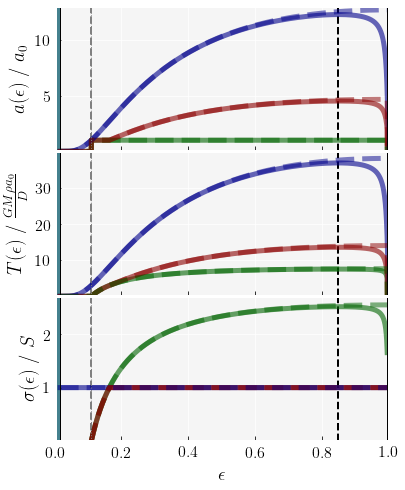

In [112]:
# OLD VERSION OF ABOVE PLOT (in case we want to revert)

mpl.rcParams['lines.linewidth'] = 5
def aVarying(eps,h,alpha):
    return np.exp((eta(h)-eta(eps))/alpha)
def aHybrid(eps,h,alpha):
    end=np.argwhere((eps<h) | (eps>1-r/D))
    a=np.zeros_like(eps)
    a=np.maximum( 1, np.exp(-1+ (eta(h)-eta(eps))/alpha) )
    a[end]=0
    return a
def nmVarying(eps,h,alpha):
    return np.exp(((1/h)-(1/eps)+ 0.5*h**2 - + 0.5*eps**2)/alpha)
def nmHybrid(eps,h,alpha):
    end=np.argwhere((eps<h) | (eps>1-r/D))
    a=np.zeros_like(eps)
    a=np.maximum( 1, np.exp(-1+ ((1/h)-(1/eps)+ 0.5*h**2 - + 0.5*eps**2)/alpha) )
    a[end]=0
    return a
def aUniform(eps,h,alpha):
    end=np.argwhere((eps<h) | (eps>1-r/D))
    a=np.ones_like(eps)
    a[end]=0
    return a
def tUniform(eps,h,alpha):
    end=np.argwhere((eps<h) | (eps>1-r/D))
    T=eta(h)-eta(eps)
    T[end]=0
    return T
def tVarying(eps,h,alpha):
    a=aVarying(eps,h,alpha)
    return alpha*a
def tHybrid(eps,h,alpha):
    end=np.argwhere((eps<h) | (eps>1-r/D))
    a=aHybrid(eps,h,alpha)
    thick=np.argwhere(a>1)
    T=eta(h)-eta(eps)
    T[thick]=alpha*a[thick]
    T[end]=0
    return T
def tNmHybrid(eps,h,alpha):
    end=np.argwhere((eps<h) | (eps>1-r/D))
    a=nmHybrid(eps,h,alpha)
    thick=np.argwhere(a>1)
    T=(1/h)-(1/eps) + 0.5*h**2 - + 0.5*eps**2
    T[thick]=alpha*a[thick]
    T[end]=0
    return T
def tNmVarying(eps,h,alpha):
    a=nmVarying(eps,h,alpha)
    return alpha*a
def tNmUniform(eps,h,alpha):
    end=np.argwhere((eps<h) | (eps>1-r/D))
    T=(1/h)-(1/eps) + 0.5*h**2 - + 0.5*eps**2
    T[end]=0
    return T

#ADD - 3 panel plot with T and sigma
plotAlpha=0.6
eps=np.linspace(R/D,1-0.1*r/D,10000)
#eps0=H/(D)
alpha=3
h=Rgeo/D
#varying=aVarying(eps,h,alpha)
#hybrid=aHybrid(eps,h,alpha)
#noMoonVarying=nmVarying(eps,h,alpha)
#noMoonHybrid=nmHybrid(eps,h,alpha)
#uniform=aUniform(eps,h,alpha)

#tVary = tVarying(eps,h,alpha)
#tUni = tUniform(eps,h,alpha)
#tHyb = tHybrid(eps,h,alpha)
#aFull=aPlot(eps,eps0,alpha,mu)
#aMoon=aPlot(eps,eps0,alpha,0)
#aHybridFull=aHybridPlot(eps,eps0,alpha,mu)
#aHybridMoon=aHybridPlot(eps,eps0,alpha,0)

modelFig = plt.figure(figsize=(6,8))
modelGrid=mpl.gridspec.GridSpec(3,1)
modelGrid.update(hspace=0.0)

areaPlot=plt.subplot(modelGrid[0,0])

areaPlot.axvline(Rgeo/D,c='grey',ls='--',lw=2)
areaPlot.axvline(l,c='k',ls='--',lw=2)

areaPlot.plot(eps, aUniform(eps,h,alpha), c='darkgreen',alpha=plotAlpha)
areaPlot.plot(eps, aVarying(eps,h,alpha), c='darkblue',alpha=plotAlpha)
areaPlot.plot(eps, aHybrid(eps,h,alpha), c='darkred',alpha=plotAlpha)
areaPlot.plot(eps, aUniform(eps,h,alpha), c='darkgreen',alpha=0.5,ls='--')
areaPlot.plot(eps, nmVarying(eps,h,alpha), c='darkblue',alpha=0.5,ls='--')
areaPlot.plot(eps, nmHybrid(eps,h,alpha), c='darkred',alpha=0.5,ls='--')

areaPlot.set_ylim(0,13)
areaPlot.set_xlim(0,1.002)
areaPlot.axvspan(-R/D,R/D,color='#45818E')
areaPlot.axvline(R/D,color='k',lw=1)
areaPlot.axvspan(1-r/D,1+r/D,color='#CCCCCC')
areaPlot.axvline(1-r/D,color='k',lw=1)
areaPlot.set_ylabel(r'$a(\epsilon) \ / \ a_0$')
areaPlot.set_xticklabels([])
areaPlot.set_yticks([5,10])
areaPlot.axvline(Rgeo/D,c='grey',ls=':',lw=1)
#areaPlot.set_xlabel(r'$\epsilon$')

tensionPlot=plt.subplot(modelGrid[1,0])

tensionPlot.axvline(Rgeo/D,c='grey',ls='--',lw=2)
tensionPlot.axvline(l,c='k',ls='--',lw=2)

tensionPlot.plot(eps, tUniform(eps,h,alpha), c='darkgreen',alpha=plotAlpha)
tensionPlot.plot(eps, tVarying(eps,h,alpha), c='darkblue',alpha=plotAlpha)
tensionPlot.plot(eps, tHybrid(eps,h,alpha), c='darkred',alpha=plotAlpha)
tensionPlot.plot(eps, tNmHybrid(eps,h,alpha), c='darkred',alpha=0.5, ls='--')
tensionPlot.plot(eps, tNmVarying(eps,h,alpha), c='darkblue',alpha=0.5, ls='--')
tensionPlot.plot(eps, tNmUniform(eps,h,alpha), c='darkgreen',alpha=0.5, ls='--')
tensionPlot.set_ylim(0,40)
tensionPlot.set_xlim(0,1.002)
tensionPlot.axvspan(-R/D,R/D,color='#45818E')
tensionPlot.axvline(R/D,color='k',lw=1)
tensionPlot.axvspan(1-r/D,1+r/D,color='#CCCCCC')
tensionPlot.axvline(1-r/D,color='k',lw=1)
tensionPlot.set_ylabel(r'$T(\epsilon) \ / \ \frac{GM \rho a_0}{D}$')
tensionPlot.set_xticklabels([])
tensionPlot.set_yticks([10,20,30])
tensionPlot.axvline(Rgeo/D,c='grey',ls=':',lw=1)

sigmaPlot=plt.subplot(modelGrid[2,0])

sigmaPlot.axvline(Rgeo/D,c='grey',ls='--',lw=2)
sigmaPlot.axvline(l,c='k',ls='--',lw=2)

end=np.argwhere(eps>h)
sigmaPlot.plot(eps[end],tUniform(eps[end],h,alpha)/(alpha*aUniform(eps[end],h,alpha)),c='darkgreen',alpha=plotAlpha)
sigmaPlot.plot(eps[end],tNmUniform(eps[end],h,alpha)/(alpha*aUniform(eps[end],h,alpha)),c='darkgreen',alpha=0.5,ls='--')
sigmaPlot.plot(eps,tVarying(eps,h,alpha)/(alpha*aVarying(eps,h,alpha)),c='darkblue',alpha=plotAlpha)
sigmaPlot.plot(eps[end],tNmHybrid(eps[end],h,alpha)/(alpha*nmHybrid(eps[end],h,alpha)),c='darkred',alpha=0.5,ls='--')
sigmaPlot.plot(eps[end],tHybrid(eps[end],h,alpha)/(alpha*aHybrid(eps[end],h,alpha)),c='darkred',alpha=plotAlpha)
sigmaPlot.plot(eps,tNmVarying(eps,h,alpha)/(alpha*nmVarying(eps,h,alpha)),c='darkblue',alpha=0.5,ls='--')
sigmaPlot.set_ylim(0,2.7)
sigmaPlot.set_xlim(0,1.002)
sigmaPlot.axvspan(-R/D,R/D,color='#45818E')
sigmaPlot.axvline(R/D,color='k',lw=1)
sigmaPlot.axvspan(1-r/D,1+r/D,color='#CCCCCC')
sigmaPlot.axvline(1-r/D,color='k',lw=1)
sigmaPlot.set_ylabel(r'$\sigma(\epsilon) \ / \ S$')
sigmaPlot.set_xlabel(r'$\epsilon$')
sigmaPlot.set_yticks([1,2])
sigmaPlot.axvline(Rgeo/D,c='grey',ls=':',lw=1)

plt.savefig('plots/area.pdf',bbox_inches='tight')
plt.show()
mpl.rcParams['lines.linewidth'] = 2

height in inches:  12.867148014440433


NameError: name 'aHybridPlot' is not defined

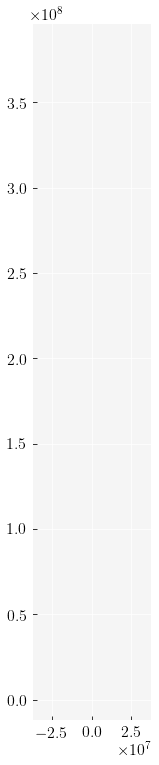

In [50]:
# NO IDEA WHAT THIS CELL DOES (DID?...)

H=Rgeo # I THINK... Coming back to old code

widthInches=4.8
widthEarths=12
heightInches=widthInches*(D+4*R)/(2*R*widthEarths)
mm=widthEarths*R*widthInches/121.92 #width to make line 1mm long
print('height in inches: ',heightInches)
mainFig=plt.figure(figsize=(widthInches,heightInches))
mainGrid=mpl.gridspec.GridSpec(2,2)
mainPlot=plt.subplot(mainGrid[:,0])
mainPlot.set_xlim(-widthEarths*R/2,widthEarths*R/2)
mainPlot.set_ylim(-2*R,D+2*R)

angles=np.linspace(0,2*np.pi,1000)
xEarth=R*np.cos(angles)
yEarth=R*np.sin(angles)
xGeo=H*np.cos(angles)
yGeo=H*np.sin(angles)
#xISS=1.1*R*np.cos(angles)
#yISS=1.1*R*np.sin(angles)
xMoon=r*np.cos(angles)
yMoon=D + (r*np.sin(angles))

h=4*R/D
eps=np.linspace(h,1-(r/D),10000)
area=aHybridPlot(eps,h,3,mu)
rad=600*np.sqrt(1e-6*area/np.pi) #width in mm
xCable=np.hstack((rad*mm,-np.flip(rad,axis=0)*mm))
yCable=np.hstack((D*eps,D*np.flip(eps,axis=0)))

mainPlot.fill(xCable,yCable,alpha=0.8)

mainPlot.fill(xEarth,yEarth,c='green',alpha=0.5)
mainPlot.plot(xEarth,yEarth,c='k')
mainPlot.fill(xMoon,yMoon,color='grey')
mainPlot.plot(xMoon,yMoon,c='k')
mainPlot.plot(xGeo,yGeo,c='grey',ls='--')

mainPlot.axhline(D*(1-np.sqrt(mu))/(1-mu),c='grey')
mainPlot.set_frame_on(False)
mainPlot.set_xticks([])
mainPlot.set_yticks([])

moonPlot=plt.subplot(mainGrid[0,1])
moonHeight=D+3*r - D*(1-np.sqrt(mu))/(1-mu) # vertical scale of moon plot
moonWidth=moonHeight*widthInches/heightInches
moonPlot.set_ylim(D*(1-np.sqrt(mu))/(1-mu) -r,D+2*r)
moonPlot.set_xlim(-moonWidth/2,moonWidth/2)

moonFudge=0.25
moonPlot.fill(moonFudge*xCable,yCable,alpha=0.8)

moonPlot.fill(xMoon,yMoon,color='grey')
moonPlot.plot(xMoon,yMoon,c='k')
moonPlot.axhline(D*(1-np.sqrt(mu))/(1-mu),c='grey')

moonPlot.axhline(D*(1-np.sqrt(mu))/(1-mu),c='grey')
moonPlot.set_frame_on(False)
moonPlot.set_xticks([])
moonPlot.set_yticks([])

earthPlot=plt.subplot(mainGrid[1,1])
earthHeight=1.5*H+2*R # vertical scale of moon plot
earthWidth=earthHeight*widthInches/heightInches
earthPlot.set_ylim(-2*R,1.5*H)
earthPlot.set_xlim(-earthWidth/2,earthWidth/2)

earthFudge=0.5
earthPlot.fill(earthFudge*xCable,yCable,alpha=0.8)

earthPlot.fill(xEarth,yEarth,c='green',alpha=0.5)
earthPlot.plot(xEarth,yEarth,c='k')
earthPlot.plot(xGeo,yGeo,c='grey',ls='--')
#earthPlot.axhline(D*(1-np.sqrt(mu))/(1-mu),c='grey')

#earthPlot.axhline(D*(1-np.sqrt(mu))/(1-mu),c='grey')
earthPlot.set_frame_on(False)
earthPlot.set_xticks([])
earthPlot.set_yticks([])

plt.savefig('plots/scale.pdf',bbox_inches='tight')
plt.show()

In [38]:
def aHybridIntegrate(eps,h,alpha):
    b=1 + (h - (mu/(1-h))) / (1-(h/alpha))
    c=h*(1 - (mu/(1-h))) / (1-(h/alpha))
    eps0=0.5*(b - np.sqrt(b**2 -4*c))
    A=np.exp((1-eps0*(1-mu))/(alpha*eps0*(1-eps0)))
    a=A*np.exp(-(1-eps*(1-mu))/(alpha*eps*(1-eps)))
    if a<1:
        a=1
    return a
def mIntegrate(h,rho,a0,alpha):
    return D*rho*a0*scipy.integrate.quad(aHybridIntegrate,h,1-r/D,args=(h,alpha))[0]
def optimizeFunction(h,rho,a0,alpha,m):
    return mIntegrate(h,rho,a0,alpha)-m
def hFind(m,rho,a0,alpha):
    return scipy.optimize.brentq(optimizeFunction,1e-6,1-(r/D),args=(rho,a0,alpha,m))
hs=np.zeros((10,10))
alphas=10**np.linspace(0,2,10)
ms=10**np.linspace(4,8,10)
for i in range(10):
    print('i: ',i)
    for j in range(10):
        alpha=alphas[i]
        m=ms[j]
        hs[i,j]=hFind(m,1000,1e-6,alpha)
#print(hFind(15000,1,1e-6,3))

i:  0


/Users/Zephyr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
/Users/Zephyr/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


i:  1
i:  2
i:  3
i:  4
i:  5
i:  6
i:  7
i:  8
i:  9


In [ ]:
print(mIntegrate(0.33,1000,1e-6,10)/1000)

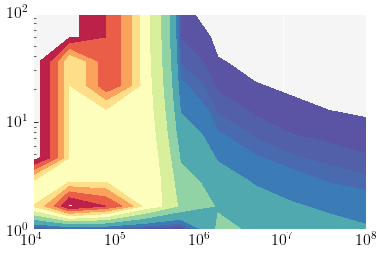

In [39]:
fillLevels=np.array([R/D,2*R/D,3*R/D,4*R/D,H/D,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
X, Y = np.meshgrid(ms, alphas)
bPlot=plt.gca()
bPlot.set_xscale('log')
bPlot.set_yscale('log')
bPlot.contourf(X,Y,hs,fillLevels,cmap='Spectral_r')
plt.show()

In [40]:
# NO IDEA WHAT THIS CELL DOES (DID?...)

def epsilon1(eps0):
    kappa=(1-eps0*(1-mu))/(eps0*(1-eps0))
    b=1+kappa-mu
    return 0.5*(b+np.sqrt(b**2 - 4*kappa))/kappa
def collapseEpsilon1(alpha):
    hDash=1-(r/D)
    a=alpha - (1/hDash) - (mu/(1-hDash))
    b=alpha - (1/hDash) - (hDash*mu/(1-hDash)) + 1
    return (b-np.sqrt(b**2 - 4*a))/(2*a)
def epsilonCheck(h,alpha):
    collapse=collapseEpsilon1(alpha)
    eps0=epsilon0(h,alpha)
    eps1=epsilon1(eps0)
    return eps1-collapse
def epsilonMax():
    return (1-np.sqrt(mu))/(1-mu)
def hMin(length,alpha):
    rho=1
    a0=1
    m=length*a0*rho
    return hFind(m,rho,a0,alpha)
nHs=16
alphas=10**np.linspace(0,2,nHs)
hs=np.zeros(nHs)
hMins=np.zeros(nHs)
#length=10*D
epsMax=epsilonMax()
for i in range(nHs):
    hs[i]=scipy.optimize.brentq(epsilonCheck,R/D,1-(r/D),args=(alphas[i]))
    #hMins[i]=hMin(length,alphas[i])
    #if hMins[i]>hs[i]:
    #    hMins[i]=hs[i]
hs[hs>epsMax]=epsMax

hFill=np.append(hs,[1-r/D,1-r/D])
aFill=np.append(alphas,[100,1])
#eps0=epsilon0(R/D,3)
#print(eps0)
#print(epsilon1(eps0))
hybridPlot=plt.gca()
hybridPlot.fill(hFill,aFill,c='b',alpha=0.2)
hybridPlot.plot(hs,alphas,c='k',lw=2)

lengths=D*np.array([1,2,5,20,100,1000,100000])
for length in lengths:
    print('length: ',length)
    for i in range(nHs):
        hMins[i]=hMin(length,alphas[i])
    hMins[hMins<R/D]=R/D
    hybridPlot.plot(hMins,alphas,c='k')
    hMinFill=np.append(hMins,[R/D,R/D])
    hybridPlot.fill(hMinFill,aFill,c='r',alpha=0.1)
    
        
#hybridPlot.plot(hMins,alphas,c='k',lw=2)
hybridPlot.set_yscale('log')
hybridPlot.axvspan(-R/D,R/D,color='green',alpha=0.5)
hybridPlot.axvspan(1-(r/D),1+(r/D),color='grey')
hybridPlot.set_xlim(-R/D,1+(r/D))
hybridPlot.axvline(R/D,c='k',lw=1)
hybridPlot.axvline(1-r/D,c='k',lw=1)
hybridPlot.axvline(H/D,c='grey',ls=':')
hybridPlot.axhline(3.4,c='grey',ls='--')
hybridPlot.axhline(55,c='grey',ls='--')
hybridPlot.text(0.6,1.2,'collapse',color='blue',alpha=0.8)
hybridPlot.set_ylim(1,100)
hybridPlot.set_xlabel(r'$h$')
hybridPlot.set_ylabel(r'$\alpha$')
plt.savefig('plots/hybrid.pdf',bbox_inches='tight')
plt.show()

NameError: name 'epsilon0' is not defined

In [ ]:
print(D*1e-6*1)

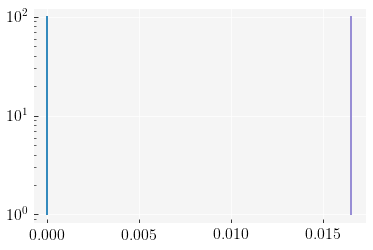

In [41]:
plt.semilogy(hs,alphas)
plt.semilogy(hMins,alphas)
plt.plot([R/D,R/D],[1,100])
plt.show()

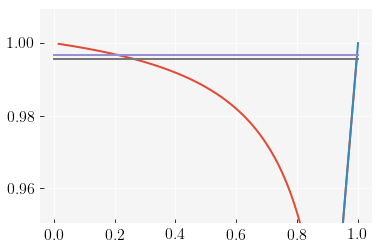

In [42]:
eps0s=np.linspace(R/D,1-(r/D),1000)
eps1s=epsilon1(eps0s)
collapse=collapseEpsilon1(1)
plt.plot(eps0s,eps1s)
plt.plot([0,1],[0,1])
plt.plot([0,1],[collapse,collapse])
plt.plot([0,1],[1-(r/D),1-(r/D)])
plt.ylim(0.95,1.01)
plt.show()

/Users/Zephyr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Zephyr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


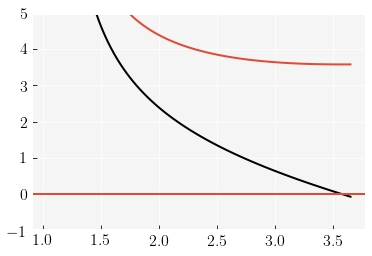

In [43]:
#mass of space elevator with counterweight
def mElevator(l,rho):
    return l*(1+((l/rho)+ 0.5*l*(rho**2) - 1 - 0.5*(l**3))/(l**3 -1))
def mCounter(l,rho):
    return l*((l/rho)+ 0.5*l*(rho**2) - 1 - 0.5*(l**3))/(l**3-1)
rho=0.15
ls=np.linspace(1,np.sqrt(2/0.15),100)
ms=mElevator(ls,rho)
mCs=mCounter(ls,rho)
uElevator=plt.gca()
uElevator.plot(ls,ms)
uElevator.plot(ls,mCs,c='k')
uElevator.axhline(0)
#uElevator.axhline(np.sqrt(2/0.15))
#uElevator.axvline(np.sqrt(2/0.15))
#uElevator.set_xlim(3,5)
uElevator.set_ylim(-1,5)
plt.show()

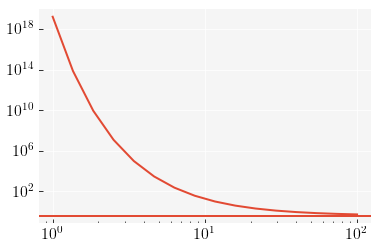

In [44]:
#area of tapered space elevator
def aElevator(epsilon,rho,beta):
    a=np.exp(((1/rho) + 0.5*(rho**2) - (1/epsilon) - 0.5*(epsilon**2))/beta)
    if a>=1:
        return a
    else:
        return 0
def lambdaTaper(beta):
    rho=0.15
    return H*scipy.integrate.quad(aElevator,rho,np.inf,args=(rho,beta))[0]
alphas=10**np.linspace(0,2,16)
lambdas=np.zeros(16)
for i in range(16):
    lambdas[i]=lambdaTaper(H*alphas[i]/D)
bPlot=plt.gca()
bPlot.plot(alphas,lambdas/D)
bPlot.axhline(np.sqrt(2/0.15)*H/D)
bPlot.set_yscale('log')
bPlot.set_xscale('log')
plt.show()

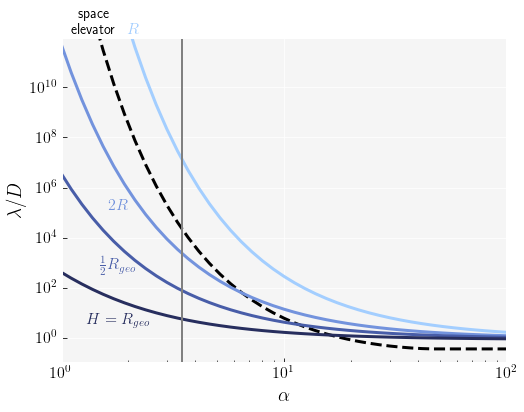

In [199]:
def eFunction(eps,alpha,rho):
    lhs= (1/rho) + 0.5*(rho**2)
    rhs= (1/eps) + 0.5*(eps**2)
    return lhs-rhs-(Rgeo/D)*alpha
def eEpsilon0(alpha):
    rho=R/Rgeo
    #print('eps0: ',eFunction(1,alpha,rho))
    if eFunction(1,alpha,rho)<0:
        return scipy.optimize.brentq(eFunction,1,100,args=(0,rho))
    return scipy.optimize.brentq(eFunction,rho,1,args=(alpha,rho))
def eEpsilon1(alpha):
    rho=R/Rgeo
    return scipy.optimize.brentq(eFunction,1,100,args=(alpha,rho))
def lFunction(eps,alpha,eps1):
    lhs= (1/eps1) + 0.5*(eps1**2)
    rhs= (1/eps) + 0.5*(eps**2)
    return lhs-rhs+(Rgeo/D)*alpha
def lEpsilon(alpha,epsilon1):
    #print('lower: ',lFunction(epsilon1,alpha,epsilon1))
    #print('upper: ',lFunction(100,alpha,epsilon1))
    return scipy.optimize.brentq(lFunction,epsilon1,100,args=(alpha,epsilon1))
def eArea(eps,alpha):
    rho=R/Rgeo
    return np.exp(D*eFunction(eps,alpha,rho)/(Rgeo*alpha))
def eLambda(alpha):
    rho=R/Rgeo
    epsilon0=eEpsilon0(alpha)
    #print('eps0: ',epsilon0)
    if epsilon0>1:
        return epsilon0-rho
    epsilon1=eEpsilon1(alpha)
    #print('eps1: ',epsilon1)
    l=lEpsilon(alpha,epsilon1)
    middle=scipy.integrate.quad(eArea,epsilon0,epsilon1,args=(alpha))[0]
    return (epsilon0-rho)+(l-epsilon1)+middle
def eBadArea(eps,alpha):
    rho=R/Rgeo
    lhs= (1/rho) + 0.5*(rho**2)
    rhs= (1/eps) + 0.5*(eps**2)
    return np.exp(D*(lhs-rhs)/(Rgeo*alpha))
def eBadLambda(alpha):
    return scipy.integrate.quad(eBadArea,R/Rgeo,np.inf,args=(alpha))[0]
nAlphas=64
alphas=10**np.linspace(0,3,nAlphas)
eLambdas=np.zeros(nAlphas)
eBadLambdas=np.zeros(nAlphas)
#minLambdas=np.zeros(nAlphas)
atmLambdas=np.zeros(nAlphas)
twoLambdas=np.zeros(nAlphas)
halfLambdas=np.zeros(nAlphas)
geoLambdas=np.zeros(nAlphas)
for i in range(nAlphas):
#    hMin=scipy.optimize.brentq(epsilonCheck,R/D,1-(r/D),args=(alphas[i]))
#    if hMin>epsMax:
#        hMin=epsMax
#    minLambdas[i]=np.max([mIntegrate(hMin,1,1,alphas[i]),D*(epsMax-(r/D))])
#    if np.isnan(minLambdas[i]):
#        minLambdas[i]=D*(epsMax-(r/D))
#    if np.isnan(minLambdas[i]):
#        minLambdas[i]=D*(epsMax-(r/D))
#    minLambdas[i]=mIntegrate(0.25,1,1,alphas[i])
    eLambdas[i]=eLambda(alphas[i])
    eBadLambdas[i]=eBadLambda(alphas[i])
    atmLambdas[i]=mIntegrate(R/D,1,1,alphas[i])
    twoLambdas[i]=mIntegrate(2*R/D,1,1,alphas[i])
    halfLambdas[i]=mIntegrate(0.5*Rgeo/D,1,1,alphas[i])
    geoLambdas[i]=mIntegrate(Rgeo/D,1,1,alphas[i])
    
lFig=plt.figure(figsize=(8,6))
lPlot=plt.gca()
lPlot.plot(alphas,Rgeo*eLambdas/D,c='k',ls='--',lw=3)
#lPlot.plot(alphas,Rgeo*eBadLambdas/D,c='k',ls='--',lw=3,alpha=0.5)
#lPlot.plot(alphas,minLambdas/D,color='purple',alpha=0.5,lw=3)
lPlot.plot(alphas,atmLambdas/D,color='#A3CEFF',alpha=1,lw=3)
lPlot.text(2.1,2e12,r'$R$',color='#A3CEFF',alpha=1,ha='center',va='center',fontsize=16)

#lPlot.plot(alphas,np.exp(1/(alphas*R/D)),color='green',alpha=0.5,lw=3,ls=':')
lPlot.plot(alphas,twoLambdas/D,color='#7393DD',alpha=1,lw=3)
lPlot.text(1.8,2e5,r'$2 R$',color='#7393DD',alpha=1,ha='center',va='center',fontsize=16)


lPlot.plot(alphas,halfLambdas/D,color='#485DA8',alpha=1,lw=3)
lPlot.text(1.8,600,r'$\frac{1}{2} R_{geo}$',color='#485DA8',alpha=1,ha='center',va='center',fontsize=16)

#lPlot.plot(alphas,np.exp(1/(alphas*2*R/D)),color='blue',alpha=0.5,lw=3,ls=':')
lPlot.plot(alphas,geoLambdas/D,color='#272E5E',alpha=1,lw=3)
lPlot.text(1.8,5,r'$H=R_{geo}$',color='#272E5E',alpha=1,ha='center',va='center',fontsize=16)
#lPlot.plot(alphas,np.exp(1/(alphas*H/D)),color='red',alpha=0.5,lw=3,ls=':')
#lPlot.axvline(3.6,c='grey',ls='--')

lPlot.text(1.4,4e12,'space \n elevator',color='k',alpha=1,ha='center',va='center',fontsize=14)

lPlot.axvline(3.5,c='grey')
lPlot.set_yscale('log')
lPlot.set_xscale('log')
lPlot.set_yticks([1,1e2,1e4,1e6,1e8,1e10])
lPlot.set_ylim(0.1,1e12)
lPlot.set_xlim(1,100)
lPlot.set_ylabel(r'$\lambda/D$')
lPlot.set_xlabel(r'$\alpha$')
plt.savefig('plots/lambda.pdf',bbox_inches='tight')
plt.show()

/Users/Zephyr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


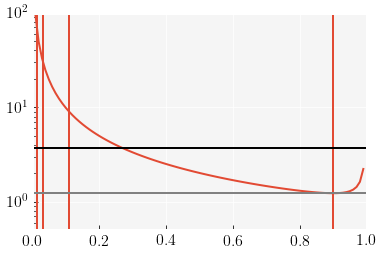

In [46]:
def eta(eps,value=0): #finds eta for a given eps, the optional parameter "value" is used for root finding
    top=1-eps*(1-mu)
    bottom=eps*(1-eps)
    return (top/bottom) - value
epss=np.linspace(0,1,100)
etas=eta(epss)
etaPlot=plt.gca()
etaPlot.plot(epss,etas)
etaPlot.axvline(R/D)
etaPlot.axvline(2*R/D)
etaPlot.axvline(H/D)
etaPlot.axvline((1-np.sqrt(mu))/(1-mu))
etaPlot.axhline(eta(1-r/D),c='k')
etaPlot.axhline(np.power(1+np.sqrt(mu),2),c='grey')
etaPlot.set_yscale('log')
etaPlot.set_ylim(0.5,100)
etaPlot.set_xlim(0,1)
plt.show()

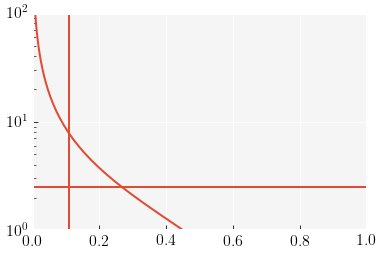

In [47]:
def hSearch(value,lBound,uBound): # finds the h at which eta is equal to a given value
    return scipy.optimize.brentq(eta,lBound,uBound,args=(value))
alphas=10**np.linspace(0,2,32)
hMins=np.zeros(32)
for i in range(32):
    hMins[i]=hSearch(alphas[i]+1.234,1e-6,1/(1+np.sqrt(mu)))
uniformPlot=plt.gca()
uniformPlot.plot(hMins,alphas)
uniformPlot.set_yscale('log')
uniformPlot.set_ylim(1,100)
uniformPlot.set_xlim(0,1)
uniformPlot.axvline(H/D)
uniformPlot.axhline(eta(1-r/D)-1.234)
plt.show()

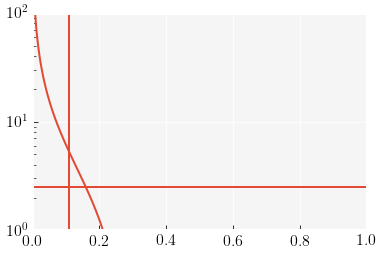

In [48]:
alphas=10**np.linspace(0,2,32)
hMins=np.zeros(32)
for i in range(32):
    hMins[i]=hSearch(alphas[i]+eta(1-r/D),1e-6,1/(1+np.sqrt(mu)))
hybridPlot=plt.gca()
hybridPlot.plot(hMins,alphas)
hybridPlot.set_yscale('log')
hybridPlot.set_ylim(1,100)
hybridPlot.set_xlim(0,1)
hybridPlot.axvline(H/D)
hybridPlot.axhline(eta(1-r/D)-1.234)
plt.show()

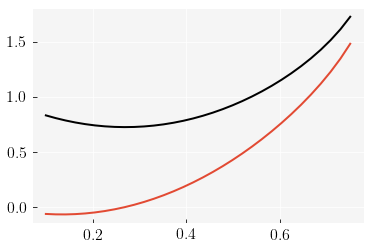

In [49]:
def muMinAnchor(h):
    top=eta(1-r/D)-eta(h)
    bottom=(h)**-2 - mu*(1-h)**-2
    return top/bottom
def lambdaSum(h):
    return (1-h-r/D)+muMinAnchor(h)
hs=np.linspace(0.1,0.75,32)
plt.plot(hs,muMinAnchor(hs))
plt.plot(hs,lambdaSum(hs),c='k')
plt.show()

In [227]:
print(eta(1-r/D))
print(1/3.6)

3.5859047612952337
0.2777777777777778


In [293]:
print(np.min(lambdaSum(hs))*D*970*1e-6)

251920.969536


In [236]:
print(eta(hMins))

[-0.99692412 -0.99692412 -0.99692412 -0.99692412 -0.99692412 -0.99692412
 -0.99692412 -0.99692412 -0.99692412 -0.99692412 -0.99692412 -0.99692412
 -0.99692412 -0.99692412 -0.99692412 -0.99692412 -0.99692412 -0.99692412
 -0.99692412 -0.99692412 -0.99692412 -0.99692412 -0.99692412 -0.99692412
 -0.99692412 -0.99692412 -0.99692412 -0.99692412 -0.99692412 -0.99692412
 -0.99692412 -0.99692412]


In [302]:
print(np.roots([eta(1-r/D),-(1+eta(1-r/D)+mu),1]))
print((1+0.5*mu)/eta(1-r/D))
print(H/D)

[ 1.00476225  0.27809784]
0.2811411507610002
0.11602769430593622


In [312]:
print(1.5e8/H)

3.557537235556399
